In [124]:
#Deep Learning Autoencoder & Clustering 
#HARROUZ MOUAD Faculty of Science and Technology MASTER2 ISICG 20208044
#Biyuzan  HAMZA Faculty of Science and Technology Master2 ISICG 20187435

import gzip 
import numpy as np
import tensorflow as tf
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D,Activation,Conv2DTranspose
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, mixture, metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time
import pandas as pd

In [98]:
def SaveResult(Result,name) :
  """
  """
  dataframe = pd.DataFrame({'Clustering algorithm': [data["name"] for data in Result],
                     'Silhouette Score': [data["Silhouette"] for data in Result],
                     'Calinski-Harabasz Score': [data["Calinski"] for data in Result],
                     'Davies-Bouldin Score':  [data["Davies"] for data in Result],
                     'V Measure Score':  [data["Vmesure"] for data in Result]
                     })
  dataframe.to_excel("OutputData/"+name+".xlsx", index=False)

In [99]:
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 28,28)

    return images, labels

In [100]:
x_train, y_train = load_mnist('InputData', kind='train')
x_test, y_test = load_mnist('InputData', kind='t10k')

In [101]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


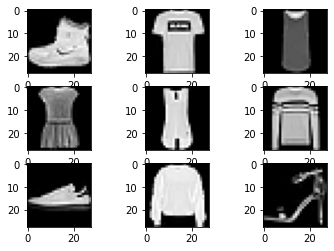

In [102]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [103]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [104]:
#Split data
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=1)


In [105]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))


Train: X=(54000, 28, 28), y=(54000,)


In [106]:
model = Sequential()
#encoder
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu',
input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(10, kernel_size=3, padding='same', activation='relu'))

#decoder

model.add(Conv2D(10, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))



"""
#EncoDer
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu',
input_shape=(28,28,1)))

model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))




#DecoDer
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))

model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
"""

model.add(Conv2D(1, kernel_size=3, padding='same', activation='relu'))


"""
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu',
input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
"""

model.compile(optimizer='adam', loss="mse", metrics=['accuracy'])
model.summary()
print(len(model.layers))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 14, 16)        4624      
                                                      

In [107]:
history=model.fit(x_train, x_train, epochs=10, batch_size=64,validation_data=(x_val, x_val), verbose=1)

Epoch 1/10
844/844 [==============================] - 12s 13ms/step - loss: 0.0209 - accuracy: 0.5057 - val_loss: 0.0126 - val_accuracy: 0.5069
Epoch 2/10
844/844 [==============================] - 11s 13ms/step - loss: 0.0123 - accuracy: 0.5084 - val_loss: 0.0095 - val_accuracy: 0.5073
Epoch 3/10
844/844 [==============================] - 11s 13ms/step - loss: 0.0108 - accuracy: 0.5088 - val_loss: 0.0102 - val_accuracy: 0.5074
Epoch 4/10
844/844 [==============================] - 11s 13ms/step - loss: 0.0101 - accuracy: 0.5090 - val_loss: 0.0079 - val_accuracy: 0.5075
Epoch 5/10
844/844 [==============================] - 11s 13ms/step - loss: 0.0096 - accuracy: 0.5092 - val_loss: 0.0081 - val_accuracy: 0.5075
Epoch 6/10
844/844 [==============================] - 11s 13ms/step - loss: 0.0092 - accuracy: 0.5092 - val_loss: 0.0079 - val_accuracy: 0.5076
Epoch 7/10
844/844 [==============================] - 11s 13ms/step - loss: 0.0089 - accuracy: 0.5093 - val_loss: 0.0082 - val_accuracy:

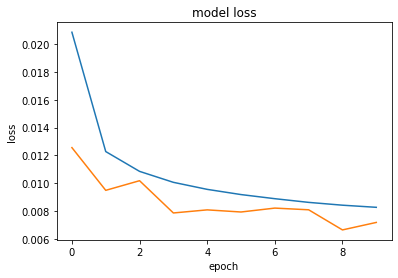

In [108]:
#loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [109]:
restored_testing_dataset = model.predict(x_test)

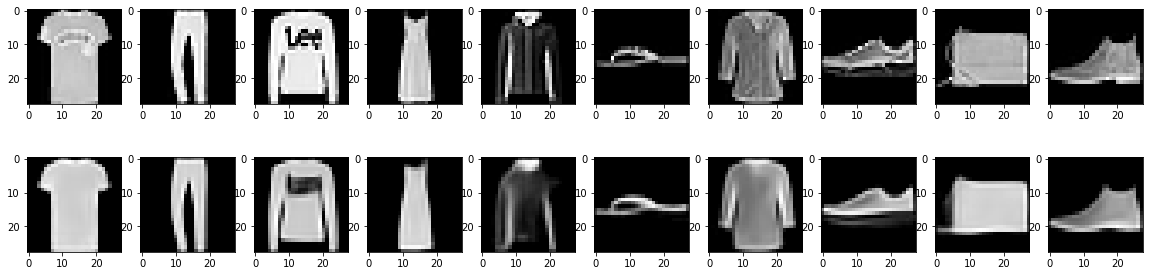

In [110]:
plt.figure(figsize=(20,5))
for i in range(10):
 index = y_test.tolist().index(i)
 plt.subplot(2, 10, i+1)
 plt.imshow(x_test[index].reshape((28,28)))
 plt.gray()
 plt.subplot(2, 10, i+11)
 plt.imshow(restored_testing_dataset[index].reshape((28,28)))
 plt.gray()

In [111]:
encoder = K.function([model.layers[0].input], [model.layers[8].output])
encoded_images = encoder([x_test])[0].reshape(-1, 7*7*10)


In [112]:
from random import randint
def DrawResults(result):
  fig = plt.figure(figsize=(20,20))
  for r in range(10):
    cluster = cm[r].argmax()
    for c, val in enumerate(x_test[result ==cluster][0:10]):
      fig.add_subplot(10, 10, 10*r+c+1)
      plt.imshow(val.reshape((28,28)))
      plt.gray()
      plt.xticks([])
      plt.yticks([])
      plt.xlabel('cluster: '+str(cluster))
      plt.ylabel('class: '+str(r))

In [113]:
def confusion_matrix_draw(ResultsLearning):
  cm = confusion_matrix(y_test, ResultsLearning)
  plt.figure(figsize=(10, 10))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title("Confusion matrix", fontsize=30)
  plt.ylabel('True label', fontsize=25)
  plt.xlabel('Clustering label', fontsize=25)
  plt.show()
  return cm

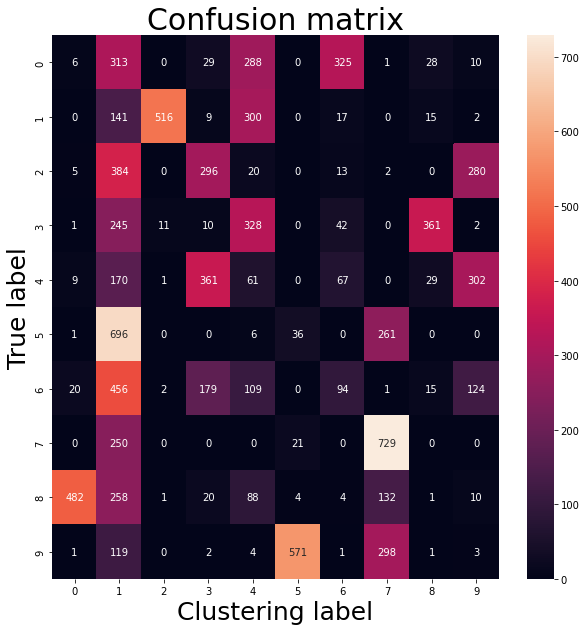

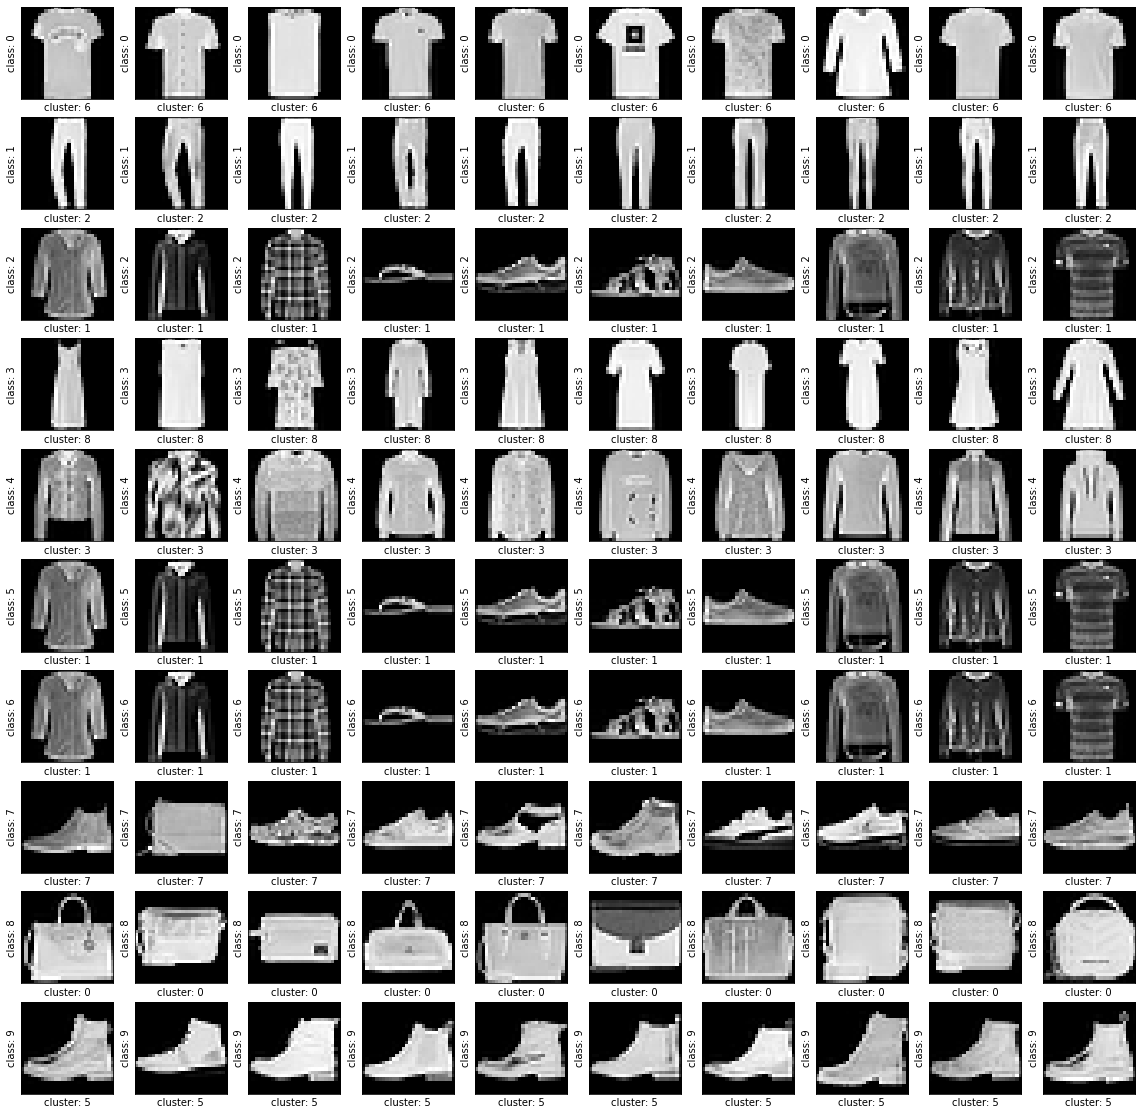

In [114]:
#Clustering Using Autoencoder
#Kmean Cluster
kmeans = KMeans(n_clusters=10)
clustered_training_set = kmeans.fit_predict(encoded_images)
cm=confusion_matrix_draw(clustered_training_set)
DrawResults(clustered_training_set)


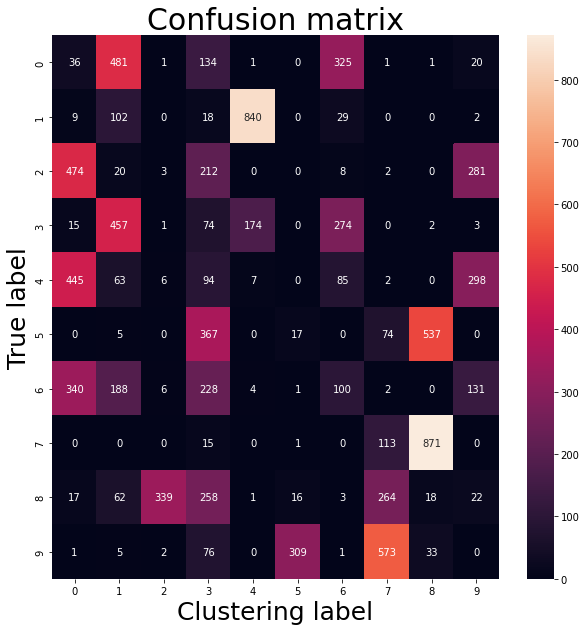

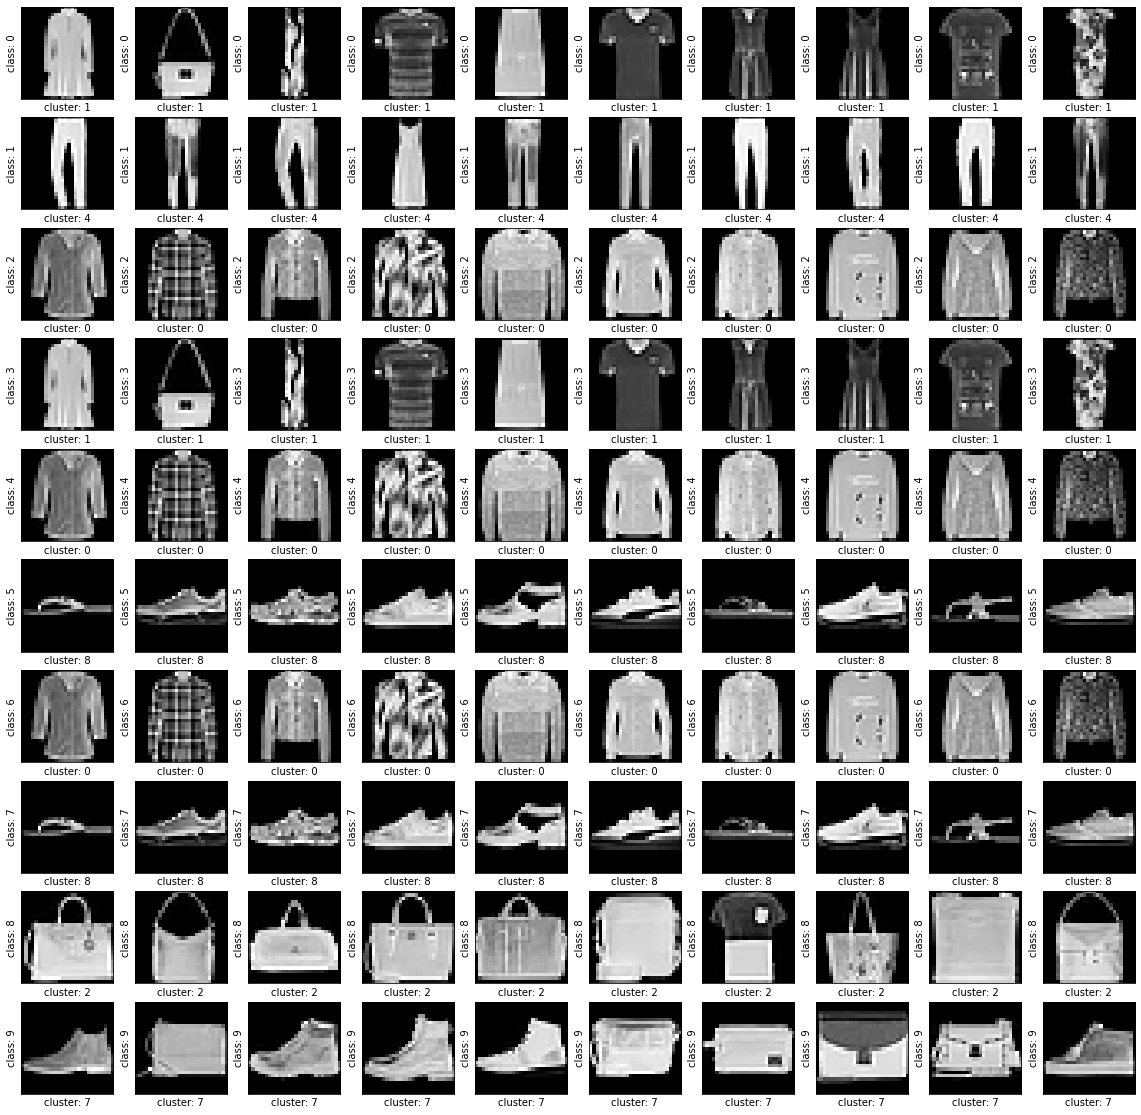

In [115]:
#GMM
GMMCluster = mixture.GaussianMixture(n_components=10, covariance_type='full')
GMMresult=GMMCluster.fit_predict(encoded_images)
cm=confusion_matrix_draw(GMMresult)
DrawResults(GMMresult)


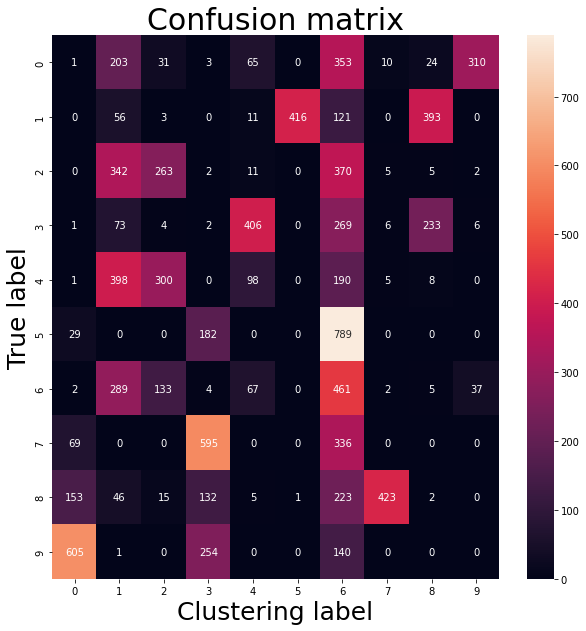

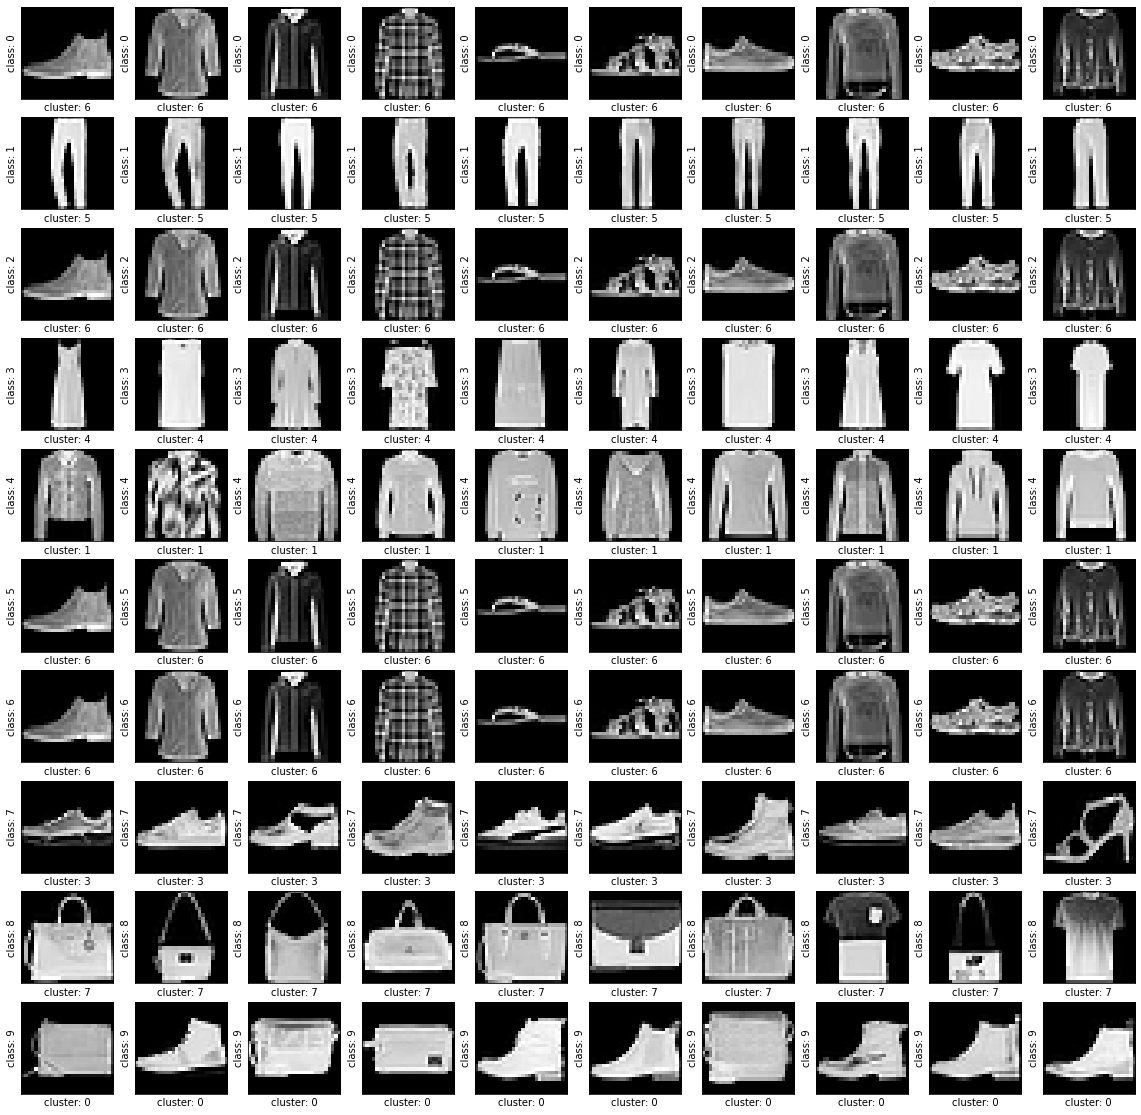

In [116]:
BirchCluster = cluster.Birch(n_clusters=10)
BirchResult=BirchCluster.fit_predict(encoded_images)
cm=confusion_matrix_draw(BirchResult)
DrawResults(BirchResult)

In [117]:
def performance_score(input_values, cluster_indexes):
 try:
  silh_score = metrics.silhouette_score(input_values,cluster_indexes)
  print(' .. Silhouette Coefficient score is   {:.2f}'.format(silh_score))
  print( ' ... -1: incorrect, 0: overlapping, +1: highly dense   clusters.')
 except:
  print(' .. Warning: could not calculate Silhouette Coefficient score.')
  silh_score = -999
 try:
   ch_score = metrics.calinski_harabasz_score(input_values,cluster_indexes)
   print(' .. Calinski-Harabasz Index score is {:.2f}'.format(ch_score))
   print(' ... Higher the value better the clusters.')
 except:
  print(' .. Warning: could not calculate Calinski-Harabasz Indexscore.')
  ch_score = -999
 try:
  db_score = metrics.davies_bouldin_score(input_values,cluster_indexes)
  print(' .. Davies-Bouldin Index score is {:.2f}'.format(db_score))
  print(' ... 0: Lowest possible value, good partitioning.')
 except:
    print(' .. Warning: could not calculate Davies-Bouldin IndexIndex score.')
    db_score = -999
 try:
   v_mesure_score=metrics.v_measure_score(y_test,clustered_training_set)
   print(' .. V Measure Index score is {:.2f}'.format(v_mesure_score))
   print(' ... 0.0 is as bad as it can be, 1.0 is a perfect score.')
 except:
   print(' .. Warning: could not calculate V Measure Index score.')
   v_mesure_score=-999
 return silh_score, ch_score, db_score,v_mesure_score

In [118]:
def Clustering(encoded_images,namefile):
  BirchCluster = cluster.Birch(n_clusters=10)
  GMMCluster = mixture.GaussianMixture(n_components=10, covariance_type='full')
  kmeans = KMeans(n_clusters=10)
  Result=list()
  clustering_algorithms = (
          ('Kmeaen', kmeans),
          ('Birch', BirchCluster),
          ('GM', GMMCluster)
      )
#
  for name, algorithm in clustering_algorithms:
    t0 = time.time()
    algorithm.fit(encoded_images)

    if hasattr(algorithm, 'labels_'):
      labels = algorithm.labels_.astype(np.int)
    else:
      labels = algorithm.predict(encoded_images)
    t1 = time.time()
    print(' Just finished with ', name, 'in {:.3f}'.format(t1-t0), 'seconds.' )

    silh_score, ch_score, db_score,v_mesure_score=performance_score(encoded_images,labels)
    resultat = {"name": name,
                             "Silhouette": silh_score,
                             "Calinski": ch_score,
                             "Davies": db_score,
                             "Vmesure": v_mesure_score}
    Result.append(resultat)
    SaveResult(Result,namefile)
    

Clustering(encoded_images,'AutoEncoderResult')

 Just finished with  Kmeaen in 4.728 seconds.
 .. Silhouette Coefficient score is   0.17
 ... -1: incorrect, 0: overlapping, +1: highly dense   clusters.
 .. Calinski-Harabasz Index score is 1368.11
 ... Higher the value better the clusters.
 .. Davies-Bouldin Index score is 1.87
 ... 0: Lowest possible value, good partitioning.
 .. V Measure Index score is 0.41
 ... 0.0 is as bad as it can be, 1.0 is a perfect score.
 Just finished with  Birch in 14.395 seconds.
 .. Silhouette Coefficient score is   0.15
 ... -1: incorrect, 0: overlapping, +1: highly dense   clusters.
 .. Calinski-Harabasz Index score is 1214.91
 ... Higher the value better the clusters.
 .. Davies-Bouldin Index score is 1.97
 ... 0: Lowest possible value, good partitioning.
 .. V Measure Index score is 0.41
 ... 0.0 is as bad as it can be, 1.0 is a perfect score.
 Just finished with  GM in 72.219 seconds.
 .. Silhouette Coefficient score is   0.08
 ... -1: incorrect, 0: overlapping, +1: highly dense   clusters.
 .. C

In [119]:
#Clustering without using CNN
x_train_WCNN, y_train_WCNN = load_mnist('InputData', kind='train')
x_test_WCNN, y_test_WCNN = load_mnist('InputData', kind='t10k')
x_train_WCNN=x_train_WCNN.astype('float32')/255.0
x_test_WCNN=x_test_WCNN.astype('float32')/255.0
x_train_WCNN,x_val_WCNN,y_train_WCNN,y_val_WCNN=train_test_split(x_train_WCNN,y_train_WCNN,test_size=0.1,random_state=1)


In [120]:
ReshapedData=np.reshape(x_test_WCNN,(10000,784))
Clustering(ReshapedData,'PixelInput')

 Just finished with  Kmeaen in 6.577 seconds.
 .. Silhouette Coefficient score is   0.16
 ... -1: incorrect, 0: overlapping, +1: highly dense   clusters.
 .. Calinski-Harabasz Index score is 1270.17
 ... Higher the value better the clusters.
 .. Davies-Bouldin Index score is 1.82
 ... 0: Lowest possible value, good partitioning.
 .. V Measure Index score is 0.41
 ... 0.0 is as bad as it can be, 1.0 is a perfect score.
 Just finished with  Birch in 35.719 seconds.
 .. Silhouette Coefficient score is   0.12
 ... -1: incorrect, 0: overlapping, +1: highly dense   clusters.
 .. Calinski-Harabasz Index score is 1116.13
 ... Higher the value better the clusters.
 .. Davies-Bouldin Index score is 1.93
 ... 0: Lowest possible value, good partitioning.
 .. V Measure Index score is 0.41
 ... 0.0 is as bad as it can be, 1.0 is a perfect score.
 Just finished with  GM in 88.703 seconds.
 .. Silhouette Coefficient score is   0.13
 ... -1: incorrect, 0: overlapping, +1: highly dense   clusters.
 .. C

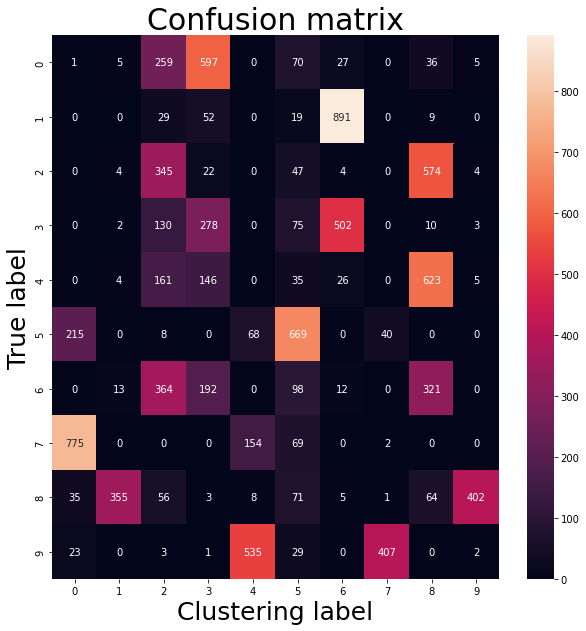

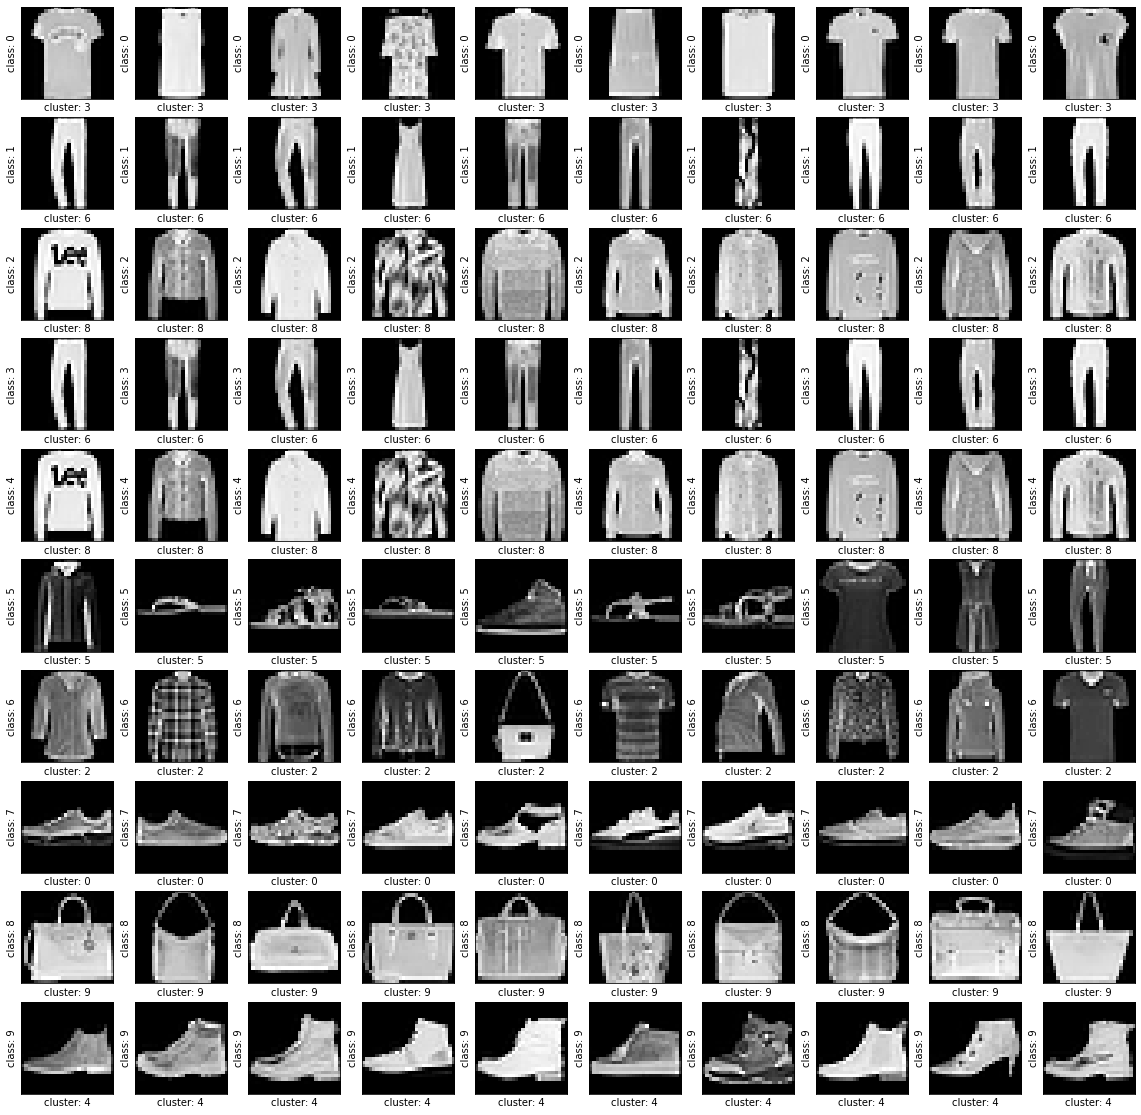

In [121]:
#Clustering Without Autoencoder
#kmean
kmeanWCNN = KMeans(n_clusters=10)
ResultKmeanwithoutCNN = kmeanWCNN.fit_predict(ReshapedData)
cm=confusion_matrix_draw(ResultKmeanwithoutCNN)
DrawResults(ResultKmeanwithoutCNN)

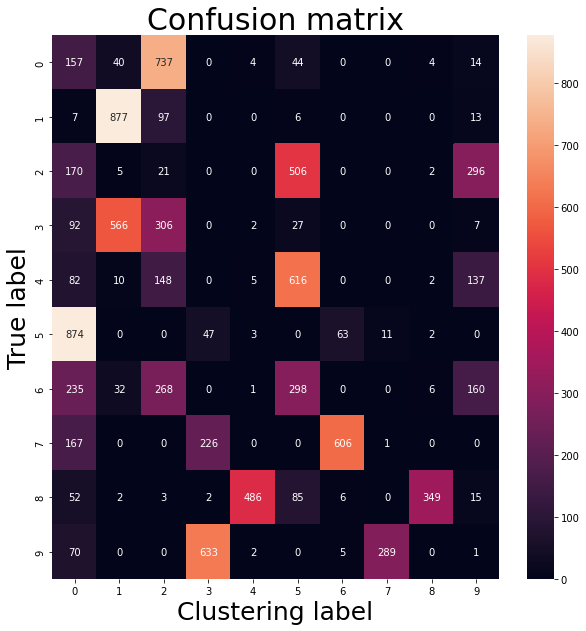

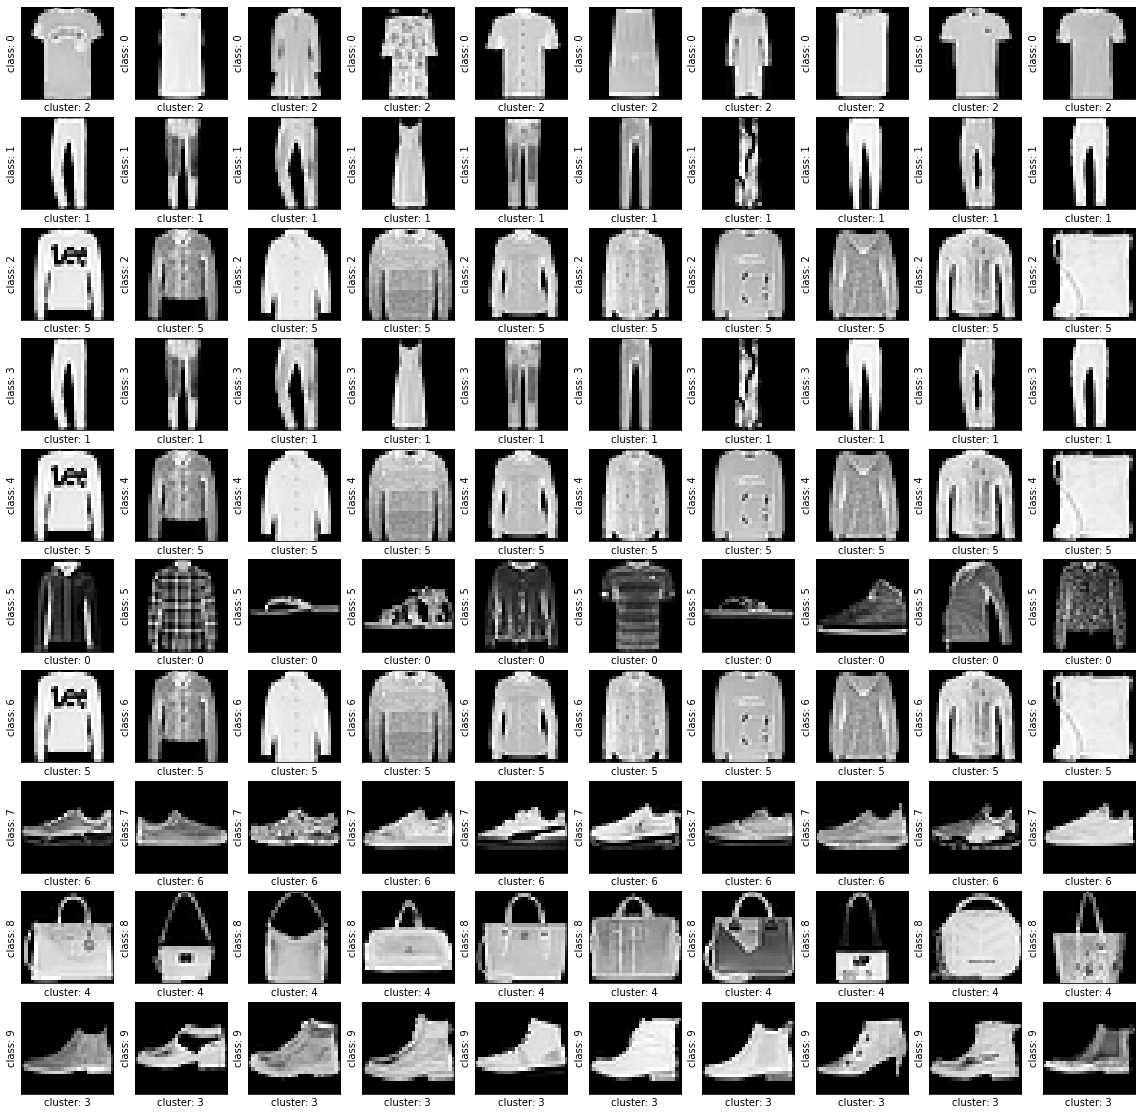

In [122]:
#Birch
BirchClusterWithoutCNN = cluster.Birch(n_clusters=10)
BirchResultwithoutCNN=BirchClusterWithoutCNN.fit_predict(ReshapedData)
cm=confusion_matrix_draw(BirchResultwithoutCNN)
DrawResults(BirchResultwithoutCNN)

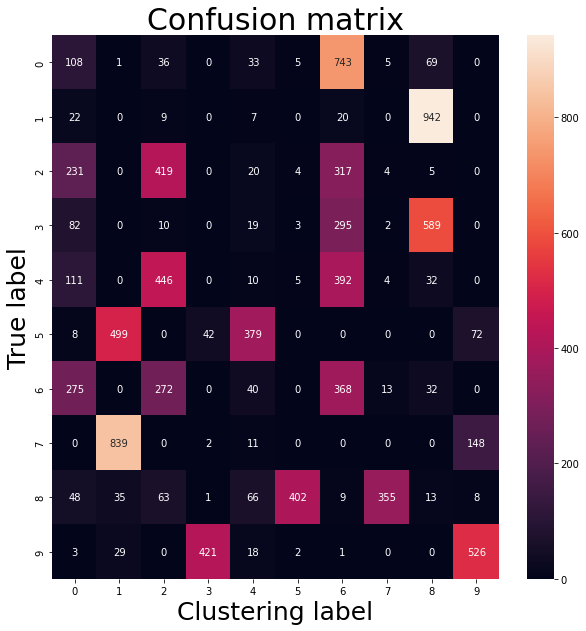

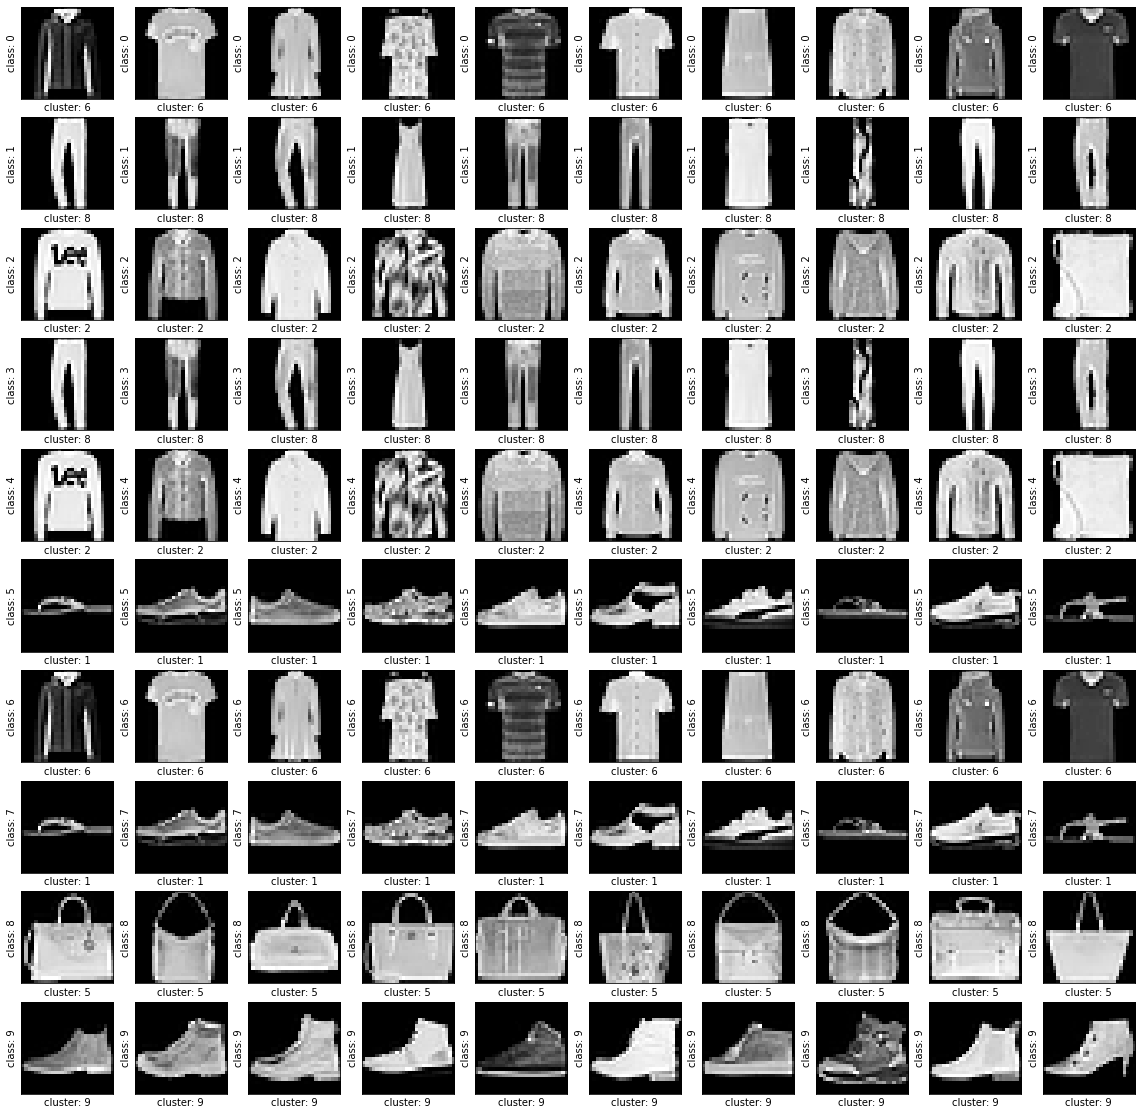

In [123]:
#GM
GMMClusterWithoutCNN = mixture.GaussianMixture(n_components=10, covariance_type='full')
GMMresultwithoutCNN=GMMClusterWithoutCNN.fit_predict(ReshapedData)
cm=confusion_matrix_draw(GMMresultwithoutCNN)
DrawResults(GMMresultwithoutCNN)